# Prospecção de Dados 2022/2023
## First Home Assignment Group 15
David Conceição 52518: 5h<br> Tomás Matos 53438: 5h<br> Rodolfo Faria 44252: 5h

#### Imports 


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, matthews_corrcoef, mean_squared_error, accuracy_score, mean_absolute_error, max_error, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from scipy.stats import pearsonr


#### Visualize the UCI Supercoductivity Dataset

In [31]:
# read the train and unique csv files 
train_data = pd.read_csv('train.csv')
unique_data = pd.read_csv('unique_m.csv')

# merge the files together
merged_dataset = pd.concat([train_data,unique_data],axis=1)

# remove critical_temp and material columns
dataset = merged_dataset.drop(['critical_temp','material'],axis=1)
print(train_data.shape,unique_data.shape,dataset.shape)
pd.DataFrame(dataset)


(21263, 82) (21263, 88) (21263, 167)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [32]:
X = np.array(dataset.values)
y = np.array(train_data.values[:,-1])
(X.shape,y.shape)


((21263, 167), (21263,))

##### Dividing the dataset into training and testing set. Scaling the X_train and X_test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('X_train shape: ' + str(X_train.shape))
print('y_train shape: ' + str((y_train.shape)))
print('X_test shape: ' + str((X_test.shape)))
print('y_test shape: ' + str((y_test.shape)))

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



X_train shape: (15947, 167)
y_train shape: (15947,)
X_test shape: (5316, 167)
y_test shape: (5316,)


## Objective 1 - Dimensionality reduction
#### Perform dimensionality reduction with PCA and analyze the data

#### PCA


In [34]:
from sklearn.decomposition import PCA

W_train, v_train = np.linalg.eig(X_train_scaled.T @ X_train_scaled)
vexp_train = W_train/W_train.sum()
pca_train= PCA(.9)
pca_train.fit(X_train_scaled)
tve=0
for i, ve in enumerate(pca_train.explained_variance_ratio_):
    tve+=ve
    print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )
print()

PC0 - Variance explained:  0.2084 - Total Variance:  0.2084
PC1 - Variance explained:  0.0585 - Total Variance:  0.2669
PC2 - Variance explained:  0.0534 - Total Variance:  0.3203
PC3 - Variance explained:  0.0435 - Total Variance:  0.3639
PC4 - Variance explained:  0.0338 - Total Variance:  0.3977
PC5 - Variance explained:  0.0224 - Total Variance:  0.4201
PC6 - Variance explained:  0.0212 - Total Variance:  0.4413
PC7 - Variance explained:  0.0187 - Total Variance:  0.4600
PC8 - Variance explained:  0.0160 - Total Variance:  0.4760
PC9 - Variance explained:  0.0152 - Total Variance:  0.4912
PC10 - Variance explained:  0.0137 - Total Variance:  0.5049
PC11 - Variance explained:  0.0129 - Total Variance:  0.5178
PC12 - Variance explained:  0.0121 - Total Variance:  0.5298
PC13 - Variance explained:  0.0113 - Total Variance:  0.5412
PC14 - Variance explained:  0.0113 - Total Variance:  0.5525
PC15 - Variance explained:  0.0112 - Total Variance:  0.5637
PC16 - Variance explained:  0.0106

In [35]:
pca = PCA(65)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.fit_transform(X_test_scaled)
(X_train_PCA.shape,X_test_PCA.shape)

((15947, 65), (5316, 65))

## Objective 2 - Create a Regression and Classification model

### 2.1. Make a regression model. We are using Linear Regression and Decision Tree


##### 2.1.1 Using the full dataset to train the models

In [36]:
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()

lr_model.fit(X_train_scaled,y_train)
dt_model.fit(X_train_scaled,y_train)

lr_preds = lr_model.predict(X_test_scaled)
dt_preds = dt_model.predict(X_test_scaled)

lr_rmse = mean_squared_error(lr_preds,y_test)
dt_rmse = mean_squared_error(dt_preds, y_test)

lr_mae = mean_absolute_error(lr_preds,y_test)
dt_mae = mean_absolute_error(dt_preds,y_test)

print("The rmse for the Linear Regression Model is %d"%(np.sqrt(lr_rmse)))
print("The rmse for the Decision Tree Model is %d"%(np.sqrt(dt_rmse)))
print()
print("The mean absolute error for the Linear Regression Model is %d"%(lr_mae))
print("The mean absolute error for the Decision Tree Model is %d"%(dt_mae))
print()
print("The Maximum Error for Linear Regression model is: ", max_error(lr_preds, y_test))
print("The Maximum Error for Decision Tree model is: ", max_error(dt_preds, y_test))
print()
lr_corr, lr_pval=pearsonr(lr_preds,y_test)
print("The Correlation Score of the Linear Regression Model is is: %6.4f (p-value=%e)\n"%(lr_corr,lr_pval))
dt_corr, dt_pval=pearsonr(dt_preds,y_test)
print("The Correlation Score of the Decision Tree Model is is: %6.4f (p-value=%e)\n"%(dt_corr,dt_pval))

The rmse for the Linear Regression Model is 16
The rmse for the Decision Tree Model is 11

The mean absolute error for the Linear Regression Model is 12
The mean absolute error for the Decision Tree Model is 6

The Maximum Error for Linear Regression model is:  104.47781125010616
The Maximum Error for Decision Tree model is:  104.0

The Correlation Score of the Linear Regression Model is is: 0.8748 (p-value=0.000000e+00)

The Correlation Score of the Decision Tree Model is is: 0.9429 (p-value=0.000000e+00)



##### 2.1.2 Using the projection of the full dataset to train the models

In [37]:
lr_model2 = LinearRegression()
dt_model2 = DecisionTreeRegressor()

lr_model2.fit(X_train_PCA,y_train)
dt_model2.fit(X_train_PCA,y_train)

lr2_preds = lr_model2.predict(X_test_PCA)
dt2_preds = dt_model2.predict(X_test_PCA)

lr2_rmse = mean_squared_error(y_test, lr2_preds)
dt2_rmse = mean_squared_error(y_test, dt2_preds)

lr2_mae = mean_absolute_error(lr2_preds,y_test)
dt2_mae = mean_absolute_error(dt2_preds,y_test)


print("The rmse for the Linear Regression Model is %d"%(np.sqrt(lr2_rmse)))
print("The rmse for the Decision Tree Model is %d"%(np.sqrt(dt2_rmse)))
print()
print("The mean absolute error for the Linear Regression Model is %d"%(lr2_mae))
print("The mean absolute error for the Decision Tree Model is %d"%(dt2_mae))
print()
print("The Maximum Error for Linear Regression model is: ", max_error(lr2_preds, y_test))
print("The Maximum Error for Decision Tree model is: ", max_error(dt2_preds, y_test))
print()
lr2_corr, lr2_pval=pearsonr(lr2_preds,y_test)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(lr2_corr,lr2_pval))
dt2_corr, dt2_pval=pearsonr(dt2_preds,y_test)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(dt2_corr,dt2_pval))

The rmse for the Linear Regression Model is 27
The rmse for the Decision Tree Model is 33

The mean absolute error for the Linear Regression Model is 21
The mean absolute error for the Decision Tree Model is 21

The Maximum Error for Linear Regression model is:  240.67232693727792
The Maximum Error for Decision Tree model is:  118.0

The Correlation Score is is: 0.6400 (p-value=0.000000e+00)

The Correlation Score is is: 0.5292 (p-value=0.000000e+00)



The results above show that the models trained with the full dataset obtained better results, this is expecteded because the projection dataset is a subset of the original dataset with less features, i.e, less information. We can also see that the best model in the ful dataset part was the **Decision Tree** with a **rmse of 11**, a **mean absolute error of 6**, a **maximum error of 100** and a **correlation score of 0.94**. With the projected dataset the **Linear Regression model** obtained better results however, as we can see from the plots shown below the Linear Regression Models are predicting negative values which are absent in the critical_temp column. We cannot really explain why this is happening, but we can clearly see that the best results of the 4 models are achieved by the Decision Tree trained with the full scaled dataset.

Text(0.5, 1.0, 'Decision Tree with projection dataset')

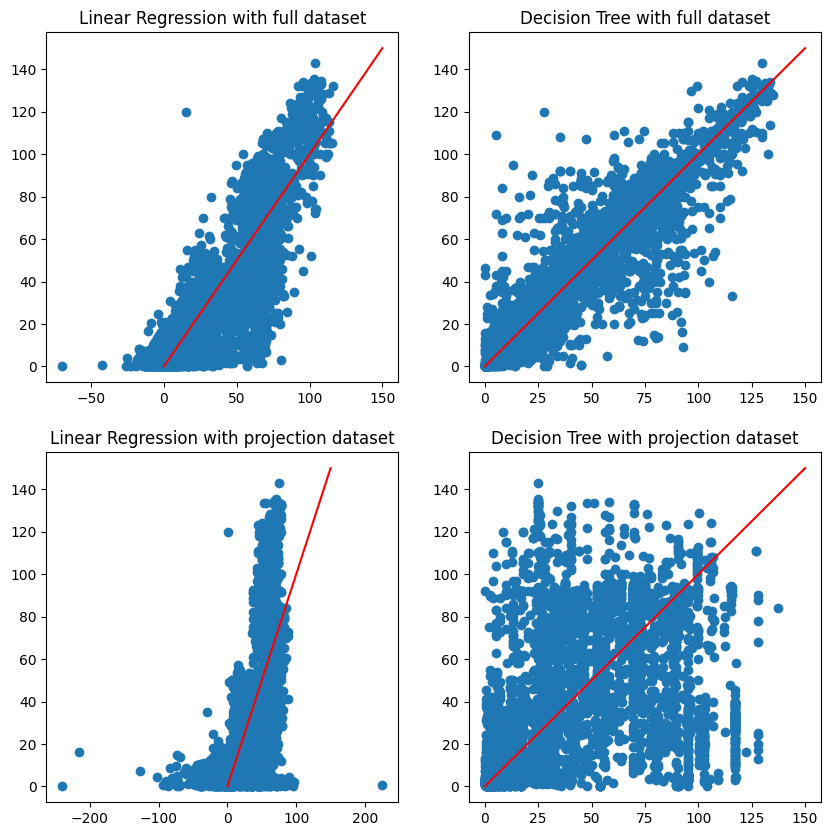

In [46]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].scatter(lr_preds, y_test)
ax[0,0].plot((0, 150), (0,150), c="r")
ax[0,0].set_title('Linear Regression with full dataset')

ax[0,1].scatter(dt_preds, y_test)
ax[0,1].plot((0, 150), (0,150), c="r")
ax[0,1].set_title('Decision Tree with full dataset')

ax[1,0].plot((0, 150), (0,150), c="r")
ax[1,0].set_title('Linear Regression with projection dataset')
ax[1,0].scatter(lr2_preds, y_test)

ax[1,1].scatter(dt2_preds, y_test)
ax[1,1].plot((0, 150), (0,150), c="r")
ax[1,1].set_title('Decision Tree with projection dataset')


### 2.2. Make a classification model

##### Create the following Classes for the dependent variable:
 VeryLow - critical_temp in [0.0, 1.0,[ <br> Low - critical_temp in [1.0, 5.0,[ <br> Medium - critical_temp in [5.0, 20.0,[ <br>  High - critical_temp in [20.0, 100.0,[  <br> VeryHigh - critical_temp in >= 10.00

In [39]:
# creating a function that gives us the data for classification
def transformToClassificationData(old_list,new_list):
    old_list = old_list.tolist()
    for i in range(len(old_list)):
        if old_list[i]>=0.0 and old_list[i]<1.0:
            new_list.append('Very Low')
        elif old_list[i]>=1.0 and old_list[i]<5.0:
            new_list.append('Low')
        elif old_list[i]>=5.0 and old_list[i]<20.0:
            new_list.append('Medium')
        elif old_list[i]>=20.0 and old_list[i]<100.0:
            new_list.append('High')
        elif old_list[i]>=100.0:
            new_list.append('Very High')  

y_train_classification = []
y_test_classification = []
transformToClassificationData(y_train, y_train_classification)
transformToClassificationData(y_test, y_test_classification)
print(y_train_classification)
print()
print(y_test_classification)

['High', 'Low', 'High', 'Medium', 'High', 'Low', 'Low', 'Medium', 'Very High', 'High', 'High', 'Medium', 'High', 'Very High', 'High', 'Very High', 'High', 'Medium', 'High', 'Low', 'High', 'Medium', 'Medium', 'Low', 'Very High', 'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Very High', 'High', 'Medium', 'Medium', 'High', 'High', 'Medium', 'Very High', 'High', 'Very High', 'High', 'High', 'Low', 'High', 'Low', 'Medium', 'Very Low', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'High', 'High', 'Medium', 'High', 'Medium', 'High', 'High', 'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Very Low', 'Medium', 'Low', 'Medium', 'High', 'High', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'High', 'Very High', 'High', 'Very Low', 'Medium', 'Very Low', 'Medium', 'High', 'Medium', 'High', 'High', 'High', 'Medium', 'Very Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium

#### 2.2.2 Create 2 models (Naive Bayes and Decision Tree Classification ) and test with the full dataset

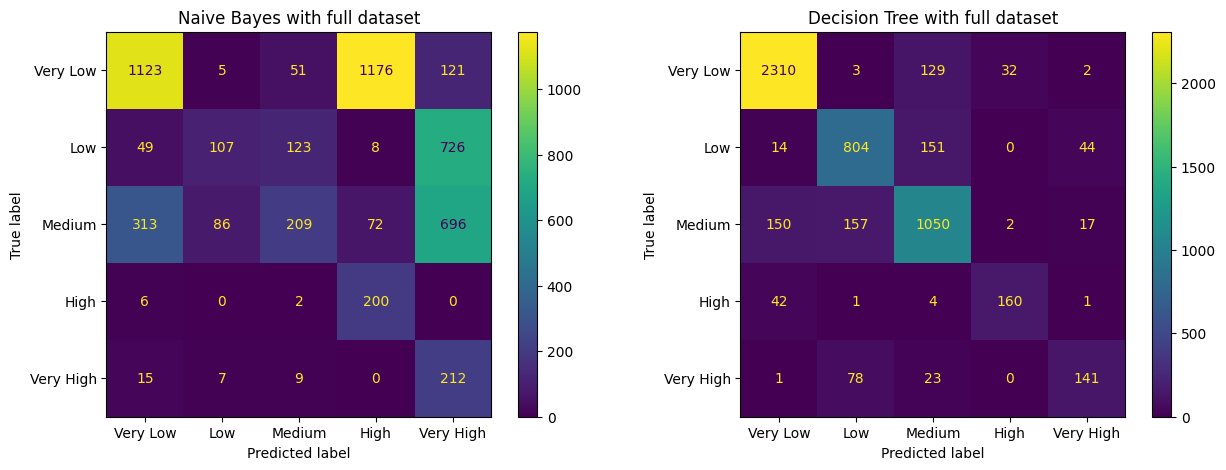

In [49]:
nb_model = GaussianNB()
dtc_model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5)

nb_model.fit(X_train_scaled, y_train_classification)
dtc_model.fit(X_train_scaled, y_train_classification)

nb_preds = nb_model.predict(X_test_scaled)
dtc_preds = dtc_model.predict(X_test_scaled)


# Plot confusion matrix
fig, axes = plt.subplots(1,2,figsize=(15, 5))
nb_cm = ConfusionMatrixDisplay(
    confusion_matrix(y_test_classification, nb_preds),
    display_labels=["Very Low", "Low", "Medium", "High", "Very High"],
)
dtc_cm = ConfusionMatrixDisplay(
    confusion_matrix(y_test_classification, dtc_preds),
    display_labels=["Very Low", "Low", "Medium", "High", "Very High"],
)

nb_cm.plot(ax=axes[0])
nb_cm.ax_.set_title('Naive Bayes with full dataset')
dtc_cm.plot(ax=axes[1])
dtc_cm.ax_.set_title('Decision Tree with full dataset')
plt.show()

The confusion matrices for both models are displayed above and we can compute the accuracy by doing the sum of the correct predicted results (diagonal), and the total number of instances. <p>
Accuracy of Naive Bayes Model = 0.35 <br>
Accuracy of Decision Tree Model = 0.84



#### 2.2.3 Create 2 models (Naive Bayes and Decision Tree Classification ) and test with a projection of the dataset obtained through PCA

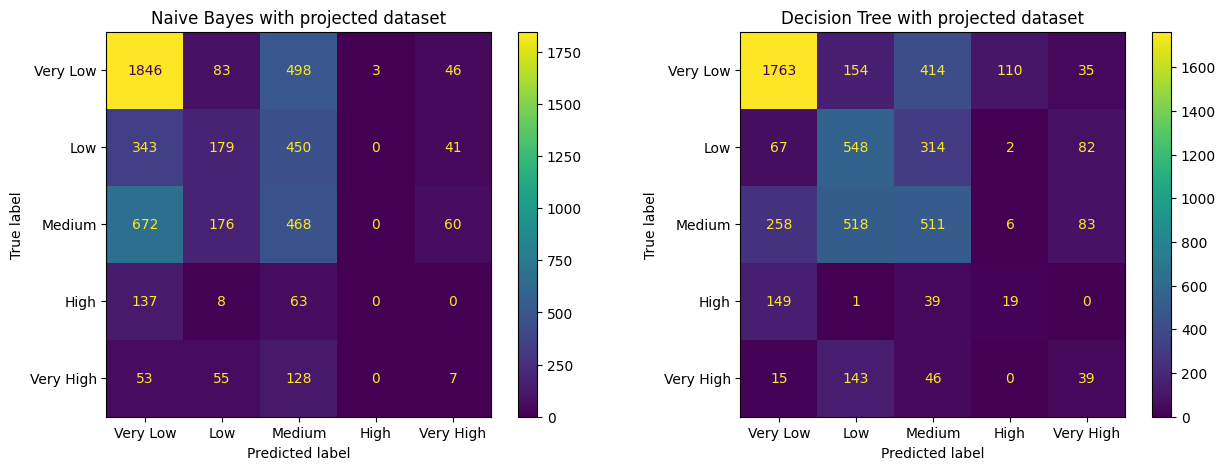

In [50]:
nb_model2 = GaussianNB()
dtc_model2 = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5)

nb_model2.fit(X_train_PCA,y_train_classification)
dtc_model2.fit(X_train_PCA,y_train_classification)

nb_preds2 = nb_model2.predict(X_test_PCA)
dtc_preds2 = dtc_model2.predict(X_test_PCA)

# Plot confusion matrix
fig, axes = plt.subplots(1,2,figsize=(15, 5))
nb2_cm = ConfusionMatrixDisplay(
    confusion_matrix(y_test_classification, nb_preds2),
    display_labels=["Very Low", "Low", "Medium", "High", "Very High"],
)
dtc2_cm = ConfusionMatrixDisplay(
    confusion_matrix(y_test_classification, dtc_preds2),
    display_labels=["Very Low", "Low", "Medium", "High", "Very High"],
)

nb2_cm.plot(ax=axes[0])
nb2_cm.ax_.set_title('Naive Bayes with projected dataset')
dtc2_cm.plot(ax=axes[1])
dtc2_cm.ax_.set_title('Decision Tree with projected dataset')
plt.show()

The accuracy for each model is calculated the same way as we did above for the models trained with the full dataset. <p>
Accuracy of Naive Bayes with projected dataset = 0.47 <br>
Accuracy of Decision Tree with projected dataset = 0.54 <p>
Again we can see that the best results where obtained in a model trained with the full dataset however we can see an improvement in the Naive Bayes Model when trained with the projected datset. This might be due to some noise in the full dataset that might create biases in the model.
